<a href="https://colab.research.google.com/github/programacaodinamica/dicas-pandas/blob/master/Pandas_Categorical_Dtype_Dica_de_Pandas_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Variáveis Categóricas no Pandas

Uma variável categórica é uma variável estatística, medida em uma escala nominal, cujas categorias identifiquem a sociedade da classe ou de grupo. O Gênero seria um exemplo de uma variável categórica, com as duas classes ou grupos (masculino e feminino). Podemos citar outros exemplos, como estações do ano (verão, outono, inverno e primavera), regiões e pontos cardeais. Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Vari%C3%A1vel_categ%C3%B3rica#:~:text=Uma%20vari%C3%A1vel%20categ%C3%B3rica%20%C3%A9%20uma,grupos%20(masculino%20e%20feminino).)


Exemplo de uso do [CategoricalDtype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.CategoricalDtype.html?highlight=categoricaldtype#pandas.CategoricalDtype). Leia mais em [Categorical data](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical-categoricaldtype).

In [27]:
!pip install geopandas

In [28]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [29]:
arquivo_BR_municipios_shapefile = '/content/drive/MyDrive/Colab Datasets/MC01/BR_Municipios/BR_Municipios_2019.shp'
arquivo_prefeitos_mais_votados_2020 = '/content/drive/MyDrive/Colab Datasets/eleicoes/prefeitos_mais_votados_1turno_2020.csv'

In [30]:
prefeitos_mais_votados_2020 = pd.read_csv(arquivo_prefeitos_mais_votados_2020)

In [31]:
prefeitos_mais_votados_2020

,NM_URNA_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,NR_PARTIDO,SG_PARTIDO,QT_VOTOS_NOMINAIS,Espectro
0,BRUNO COVAS,SÃO PAULO,71072,2º TURNO,45,PSDB,1754013,centro
1,PAULO SERRA,SANTO ANDRÉ,70572,ELEITO,45,PSDB,266591,centro
2,ORLANDO MORANDO,SÃO BERNARDO DO CAMPO,70750,ELEITO,45,PSDB,261761,centro
3,FELICIO,SÃO JOSÉ DOS CAMPOS,70998,ELEITO,45,PSDB,204800,centro
4,ALVARO DIAS,NATAL,17612,ELEITO,45,PSDB,194764,centro
...,...,...,...,...,...,...,...,...
5551,PAULINHO TIAGO,CATAS ALTAS DA NORUEGA,43079,ELEITO,33,PMN,1782,esquerda
5552,ZE WILSON,MOIPORÁ,94650,ELEITO,33,PMN,1046,esquerda
5553,TONINHO BRANDÃO,IGUATU,74381,NÃO ELEITO,33,PMN,882,esquerda
5554,LUCAS MORAES,BOM PRINCÍPIO DO PIAUÍ,10065,ELEITO,27,DC,2512,direita


In [32]:
geo_df = gpd.read_file(arquivo_BR_municipios_shapefile)

In [39]:
geo_df.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,ALTA FLORESTA D'OESTE,RO,7067.025,"POLYGON ((-62.22630 -11.89037, -62.20670 -11.8..."
1,1100023,ARIQUEMES,RO,4426.571,"POLYGON ((-63.58751 -9.84984, -63.58715 -9.849..."
2,1100031,CABIXI,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3..."
3,1100049,CACOAL,RO,3792.892,"POLYGON ((-61.50114 -11.30119, -61.50104 -11.2..."
4,1100056,CEREJEIRAS,RO,2783.300,"POLYGON ((-61.51346 -13.28575, -61.51534 -13.2..."


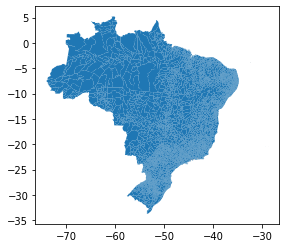

In [40]:
geo_df.plot()

In [33]:
geo_df['NM_MUN'] = geo_df['NM_MUN'].str.upper()

In [34]:
candidatos_mais_votados_2020_geo_df = geo_df.merge(prefeitos_mais_votados_2020, 
                                                   left_on='NM_MUN', 
                                                   right_on='NM_MUNICIPIO')

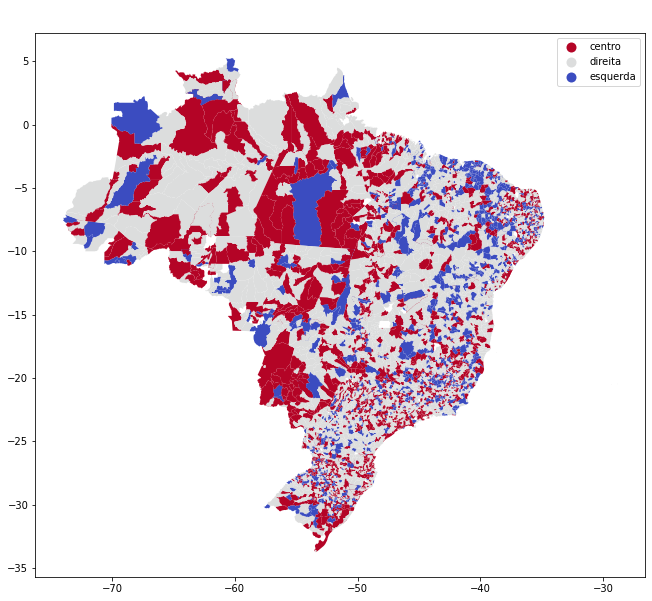

In [38]:
fig, ax = plt.subplots(1,figsize=(24,10))
ax.set_title(f'Espectro Prefeitos Mais Votados BRASIL 2020', 
             color='white', size=26)

candidatos_mais_votados_2020_geo_df.plot(column='Espectro', 
                                         legend=True, 
                                         cmap='coolwarm_r', 
                                         ax=ax);

In [41]:
# esquerda < centro < direita
espectro_cat_type = pd.CategoricalDtype(categories=['esquerda', 'centro', 'direita'], 
                                        ordered=True)

In [43]:
candidatos_mais_votados_2020_geo_df['Espectro'] = candidatos_mais_votados_2020_geo_df['Espectro'].astype(espectro_cat_type)


In [44]:
candidatos_mais_votados_2020_geo_df['Espectro']

0        direita
1        direita
2        direita
3       esquerda
4       esquerda
          ...   
6123     direita
6124     direita
6125      centro
6126     direita
6127     direita
Name: Espectro, Length: 6128, dtype: category
Categories (3, object): ['esquerda' < 'centro' < 'direita']

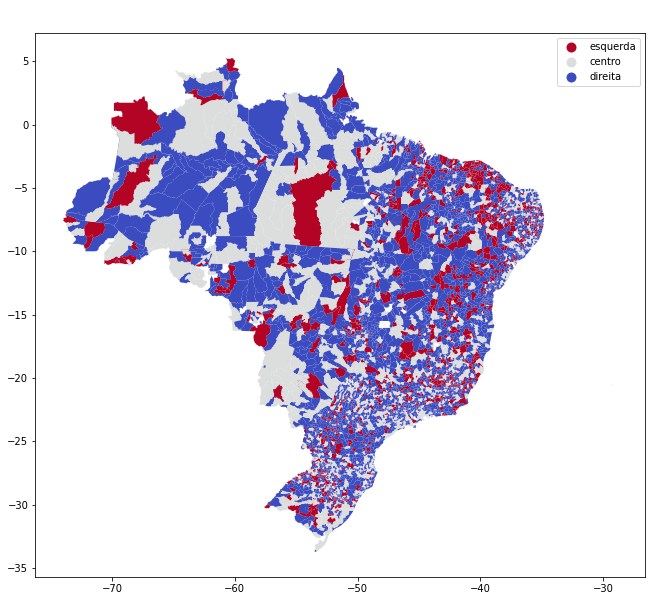

In [45]:
fig, ax = plt.subplots(1,figsize=(24,10))
ax.set_title(f'Espectro Prefeitos Mais Votados BRASIL 2020', 
             color='white', size=26)

candidatos_mais_votados_2020_geo_df.plot(column='Espectro', 
                                         legend=True, 
                                         cmap='coolwarm_r', 
                                         ax=ax);